In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
COIN_BLOCK_INFO_PATH = "coin_block_info"

coin = "SPD"
coin_per_block = 15
our_nethash = 540

fname = os.path.join(COIN_BLOCK_INFO_PATH, coin+"_block_info.csv")

In [3]:
df = pd.read_csv(fname)

In [4]:
df['date'] = pd.to_datetime(df['time'],unit='s')

In [5]:
print("Number of Blocks: {}".format(df.count()[0]))

Number of Blocks: 2000


In [6]:
print("Latest Block: {}".format(int(df["height"][0])))

Latest Block: 150359


In [7]:
df.head(5)

,difficulty,flags,height,nonce,time,date
0,2235.564539,proof-of-work,150359.0,2.937319e+09,1.525645e+09,2018-05-06 22:24:32
1,1614.573735,proof-of-work,150358.0,2.397748e+09,1.525645e+09,2018-05-06 22:23:46
2,40434.782805,proof-of-stake,150357.0,0.000000e+00,1.525645e+09,2018-05-06 22:18:56
3,3952.715205,proof-of-work,150356.0,1.719736e+09,1.525645e+09,2018-05-06 22:23:31
4,38936.953873,proof-of-stake stake-modifier,150355.0,0.000000e+00,1.525645e+09,2018-05-06 22:23:44


In [8]:
df_type = df.groupby("flags").size().reset_index(name='counts')
df_type["percentage"]=df_type["counts"]/sum(df_type["counts"])
df_type

,flags,counts,percentage
0,proof-of-stake,907,0.4535
1,proof-of-stake stake-modifier,345,0.1725
2,proof-of-work,555,0.2775
3,proof-of-work stake-modifier,193,0.0965


In [9]:
df_pow_block_rate = df[['flags','height','time']][df['flags'].str.contains("proof-of-work")].reset_index()
df_pow_block_rate.head(10)

,index,flags,height,time
0,0,proof-of-work,150359.0,1.525645e+09
1,1,proof-of-work,150358.0,1.525645e+09
2,3,proof-of-work,150356.0,1.525645e+09
3,12,proof-of-work,150347.0,1.525645e+09
4,15,proof-of-work,150344.0,1.525645e+09
5,17,proof-of-work,150342.0,1.525645e+09
6,21,proof-of-work stake-modifier,150338.0,1.525645e+09
7,26,proof-of-work,150333.0,1.525644e+09
8,27,proof-of-work,150332.0,1.525644e+09
9,31,proof-of-work,150328.0,1.525644e+09


In [10]:
df_pos_block_rate = df[['flags','height','time']][df['flags'].str.contains("proof-of-stake")].reset_index()
df_pos_block_rate.head(10)

,index,flags,height,time
0,2,proof-of-stake,150357.0,1.525645e+09
1,4,proof-of-stake stake-modifier,150355.0,1.525645e+09
2,5,proof-of-stake,150354.0,1.525645e+09
3,6,proof-of-stake,150353.0,1.525645e+09
4,7,proof-of-stake,150352.0,1.525645e+09
5,8,proof-of-stake stake-modifier,150351.0,1.525645e+09
6,9,proof-of-stake,150350.0,1.525646e+09
7,10,proof-of-stake stake-modifier,150349.0,1.525645e+09
8,11,proof-of-stake,150348.0,1.525645e+09
9,13,proof-of-stake stake-modifier,150346.0,1.525645e+09


In [11]:
MA_window = min(400, int((df_pow_block_rate.count()[0]-1)*0.5))
print("MA Windows = {}".format(MA_window))

MA Windows = 373


In [12]:
df_pow_count = df_pow_block_rate.count()[0]
df_pos_count = df_pos_block_rate.count()[0]
print("Num of POW = {}".format(df_pow_count))
print("Num of POS = {}".format(df_pos_count))

Num of POW = 748
Num of POS = 1252


In [13]:
df_pow_block_rate['pow_index'] = pd.DataFrame(range(df_pow_count)[::-1])
df_pow_block_rate.tail(5)

,index,flags,height,time,pow_index
743,1983,proof-of-work,148376.0,1.525566e+09,4
744,1986,proof-of-work,148373.0,1.525566e+09,3
745,1993,proof-of-work,148366.0,1.525566e+09,2
746,1998,proof-of-work,148361.0,1.525566e+09,1
747,1999,proof-of-work,148360.0,1.525566e+09,0


In [14]:
df_pos_block_rate['pos_index'] = pd.DataFrame(range(df_pos_count)[::-1])
df_pos_block_rate.tail(5)

,index,flags,height,time,pos_index
1247,1992,proof-of-stake stake-modifier,148367.0,1.525566e+09,4
1248,1994,proof-of-stake,148365.0,1.525566e+09,3
1249,1995,proof-of-stake,148364.0,1.525566e+09,2
1250,1996,proof-of-stake,148363.0,1.525566e+09,1
1251,1997,proof-of-stake stake-modifier,148362.0,1.525566e+09,0


In [15]:
df_pow_block_rate_window = df_pow_block_rate[["time", "pow_index"]].diff(-MA_window)
df_pow_block_rate_window.head(5)

,time,pow_index
0,39423.0,373.0
1,39890.0,373.0
2,39978.0,373.0
3,39511.0,373.0
4,39433.0,373.0


In [16]:
df_pos_block_rate_window = df_pos_block_rate[["time", "pos_index"]].diff(-MA_window)
df_pos_block_rate_window.head(5)

,time,pos_index
0,20752.0,373.0
1,21120.0,373.0
2,21280.0,373.0
3,21216.0,373.0
4,21328.0,373.0


In [17]:
df_pow_block_rate_window['block_per_day']=df_pow_block_rate_window['pow_index']/df_pow_block_rate_window['time']*3600*24
df_pow_block_rate_window.head(20)

,time,pow_index,block_per_day
0,39423.0,373.0,817.472034
1,39890.0,373.0,807.901730
2,39978.0,373.0,806.123368
3,39511.0,373.0,815.651338
4,39433.0,373.0,817.264728
5,39495.0,373.0,815.981770
6,39359.0,373.0,818.801291
7,39179.0,373.0,822.563108
8,39271.0,373.0,820.636093
9,39203.0,373.0,822.059536


In [18]:
df_pos_block_rate_window['block_per_day']=df_pos_block_rate_window['pos_index']/df_pos_block_rate_window['time']*3600*24
df_pos_block_rate_window.head(5)

,time,pos_index,block_per_day
0,20752.0,373.0,1552.968389
1,21120.0,373.0,1525.909091
2,21280.0,373.0,1514.436090
3,21216.0,373.0,1519.004525
4,21328.0,373.0,1511.027757


In [19]:
df_pow_block_rate_count = df_pow_block_rate_window.count()[0]
print(df_pow_block_rate_count)

375


In [20]:
df_pow_block_rate_full = pd.concat([df_pow_block_rate["height"].head(df_pow_block_rate_count), df_pow_block_rate_window['block_per_day']],axis=1)

In [21]:
df_pow_block_rate_full.head(3)

,height,block_per_day
0,150359.0,817.472034
1,150358.0,807.901730
2,150356.0,806.123368


In [22]:
COIN_NETHASH_INFO_PATH = "coin_nethash_info"
fname = os.path.join(COIN_NETHASH_INFO_PATH, coin+"_nethash_info.csv")

In [23]:
df_nethash = pd.read_csv(fname)

In [24]:
print("Number of Nethash Sample: {}".format(df_nethash.count()[0]))

Number of Nethash Sample: 1677


In [25]:
print("Latest Block: {}".format(int(df_nethash["height"][0])))

Latest Block: 150371


In [26]:
df_nethash.head(20)

,height,nethash
0,150371,174622
1,150370,174622
2,150369,174622
3,150368,125178
4,150364,126055
5,150361,105512
6,150360,105512
7,150359,105512
8,150358,74564
9,150355,203253


In [27]:
df_pow_nethash_block = pd.merge(df_pow_block_rate_full, df_nethash, how='inner', on='height')
df_pow_nethash_block.head(3)

,height,block_per_day,nethash
0,150359,817.472034,105512
1,150358,807.901730,74564
2,150347,815.651338,203253


In [28]:
df_pow_nethash_block["profit"]=df_pow_nethash_block["block_per_day"]*our_nethash/df_pow_nethash_block["nethash"]*coin_per_block
df_pow_nethash_block_profit = df_pow_nethash_block
df_pow_nethash_block_profit.head(5)

,height,block_per_day,nethash,profit
0,150359,817.472034,105512,62.756118
1,150358,807.901730,74564,87.763586
2,150347,815.651338,203253,32.505182
3,150344,817.264728,194972,33.952795
4,150342,815.981770,241271,27.394309


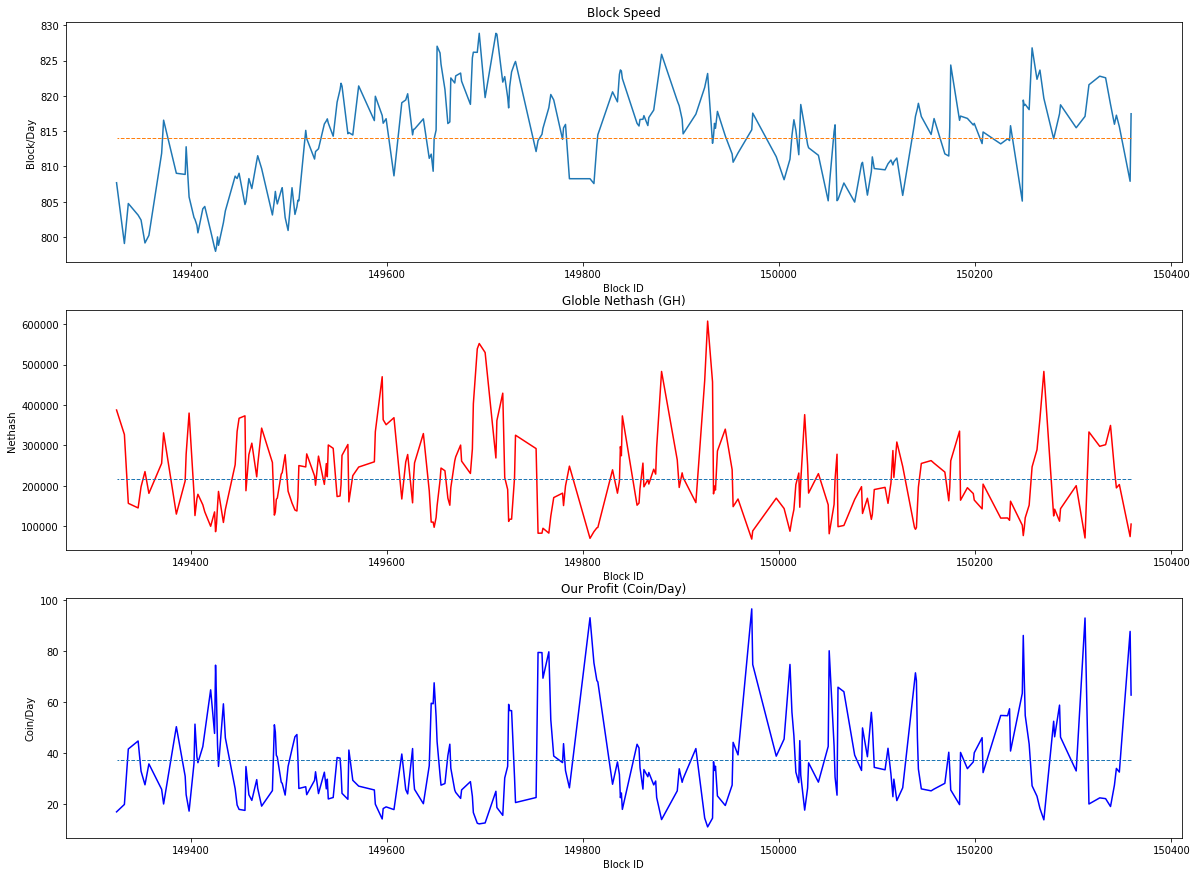

In [29]:
fig = plt.figure(figsize=(20,15))
plt.subplot(3, 1, 1)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['block_per_day'])
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['block_per_day'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)

plt.title('Block Speed')
plt.xlabel('Block ID')
plt.ylabel('Block/Day')

plt.subplot(3, 1, 2)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['nethash'], color='red')
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['nethash'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)
plt.title('Globle Nethash (GH)')
plt.xlabel('Block ID')
plt.ylabel('Nethash')

plt.subplot(3, 1, 3)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['profit'], color='blue')
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['profit'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)
plt.title('Our Profit (Coin/Day)')
plt.xlabel('Block ID')
plt.ylabel('Coin/Day')

plt.show()
